<a href="https://colab.research.google.com/github/balajisai121/3d-bioprinting-optimization/blob/main/raise_25_finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


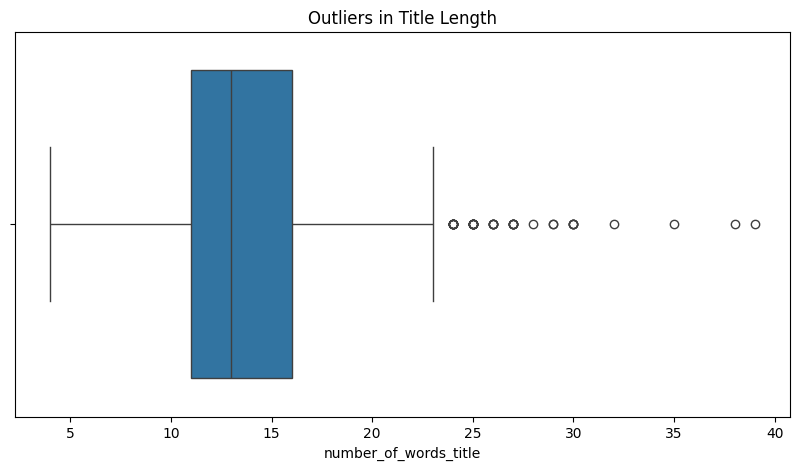

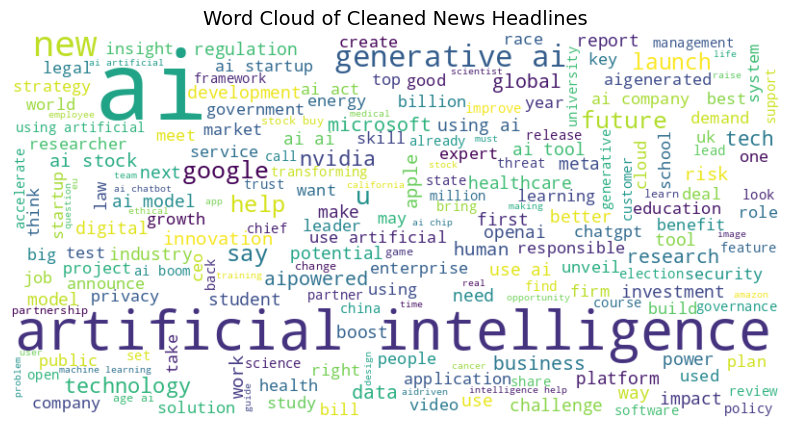

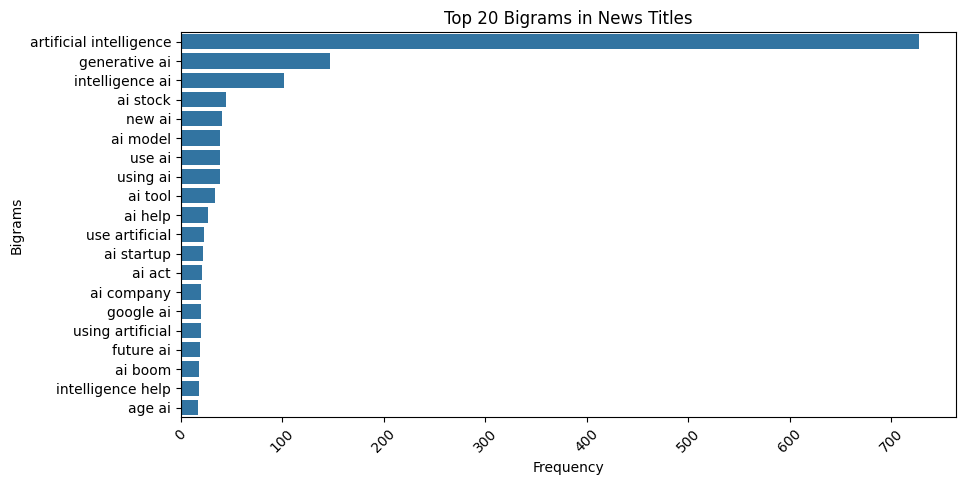

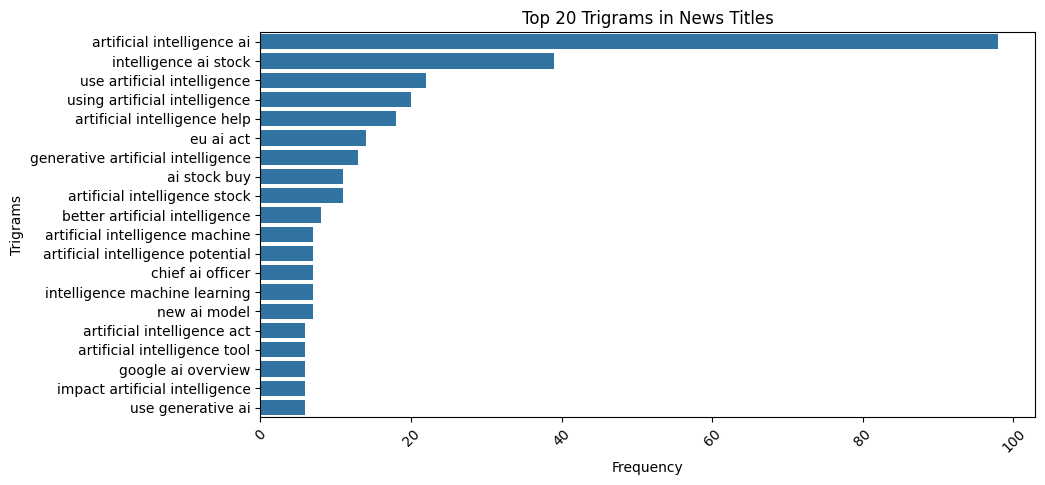

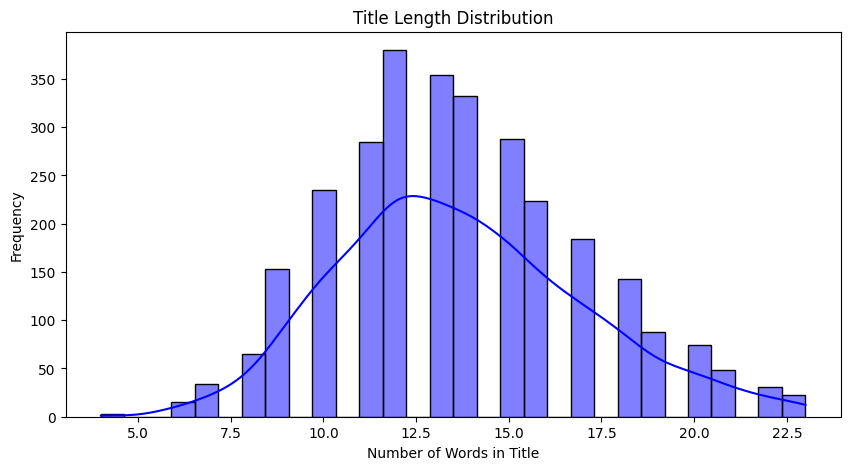

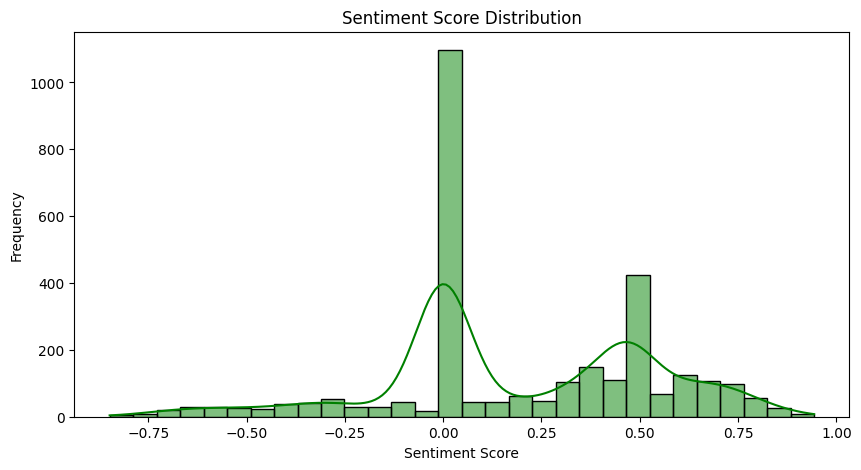

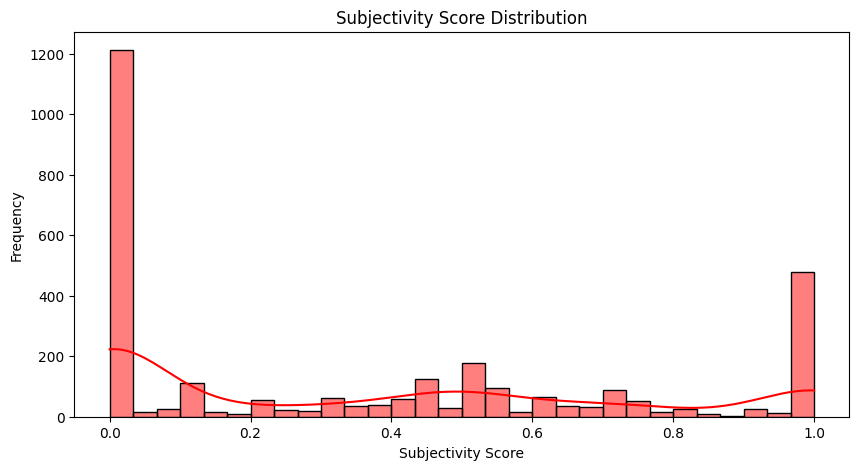

In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Ensure required NLTK resources are available
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load dataset
file_path = "Dataset_3k.csv"  # Update the path as needed
df = pd.read_csv(file_path)

# Initialize Lemmatizer and Sentiment Analyzer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

# Function for advanced text preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & Lemmatize
    return " ".join(words)

# Apply preprocessing
df["clean_title"] = df["title"].apply(preprocess_text)

# Detect Outliers in Title Length
def detect_outliers(data, column, threshold=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * threshold)
    upper_bound = Q3 + (IQR * threshold)
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = detect_outliers(df, "number_of_words_title")

# Visualize Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["number_of_words_title"])
plt.title("Outliers in Title Length")
plt.show()

# Remove Outliers
df = df[~df.index.isin(outliers.index)]

# Sentiment Analysis
df['sentiment_score'] = df['title'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['subjectivity'] = df['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Function to generate word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Function to extract top n-grams
def get_top_ngrams_sparse(texts, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    sum_words = np.array(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    word_freq = dict(zip(vocab, sum_words))
    top_ngrams = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_k]
    return top_ngrams

# Generate Word Cloud
all_text = " ".join(df["clean_title"].astype(str))
plot_wordcloud(all_text, "Word Cloud of Cleaned News Headlines")

# Get bigrams and trigrams
bigrams = get_top_ngrams_sparse(df["clean_title"], n=2)
trigrams = get_top_ngrams_sparse(df["clean_title"], n=3)

# Plot Bigrams
bigram_words, bigram_counts = zip(*bigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_counts), y=list(bigram_words))
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 20 Bigrams in News Titles")
plt.xticks(rotation=45)
plt.show()

# Plot Trigrams
trigram_words, trigram_counts = zip(*trigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(trigram_counts), y=list(trigram_words))
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 20 Trigrams in News Titles")
plt.xticks(rotation=45)
plt.show()

# Title Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["number_of_words_title"], bins=30, kde=True, color="blue")
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.title("Title Length Distribution")
plt.show()

# Sentiment Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["sentiment_score"], bins=30, kde=True, color="green")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Score Distribution")
plt.show()

# Subjectivity Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["subjectivity"], bins=30, kde=True, color="red")
plt.xlabel("Subjectivity Score")
plt.ylabel("Frequency")
plt.title("Subjectivity Score Distribution")
plt.show()

# Save the processed dataset
df.to_csv("processed_dataset.csv", index=False)


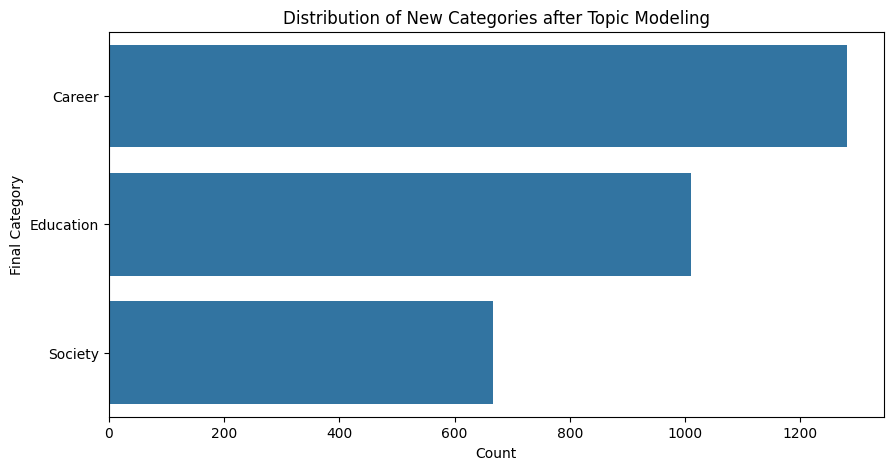

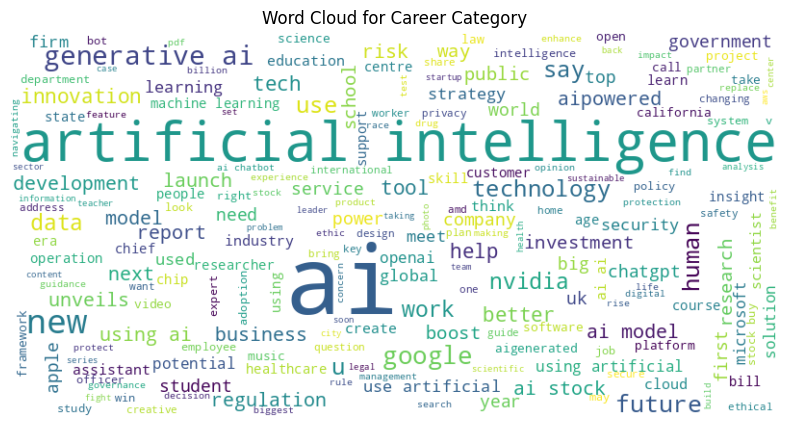

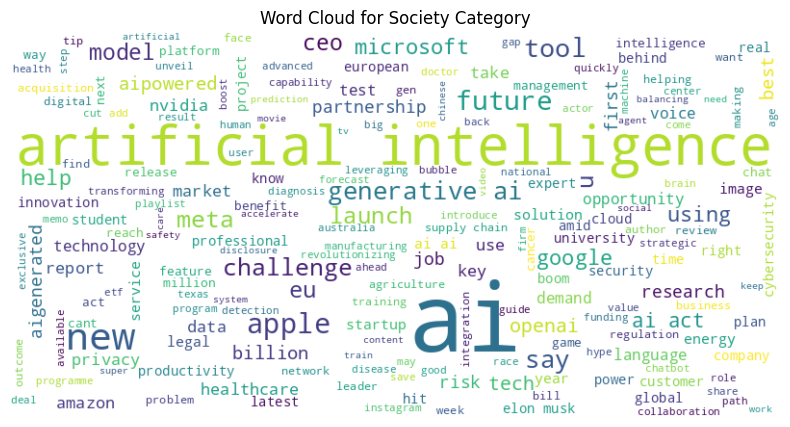

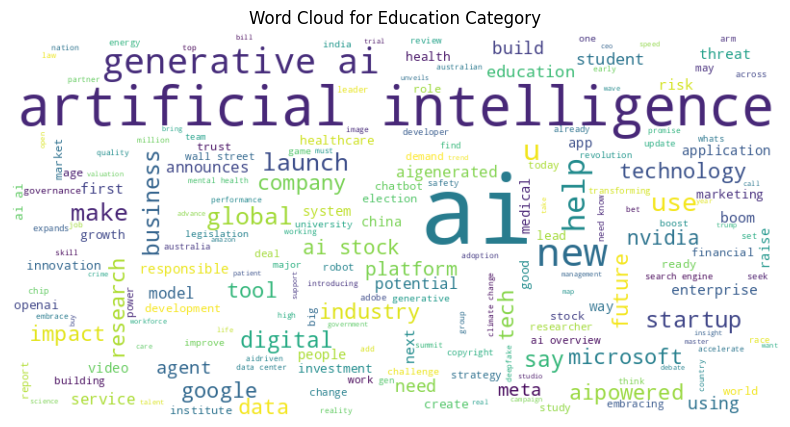

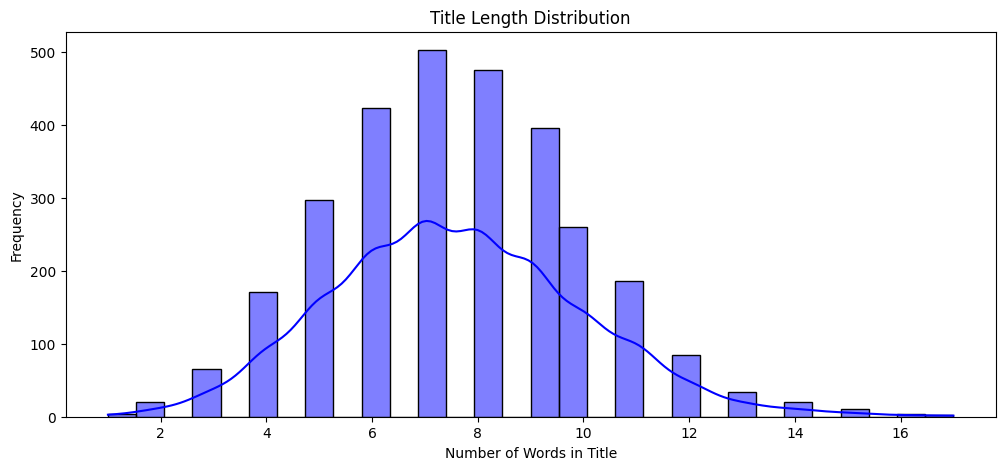

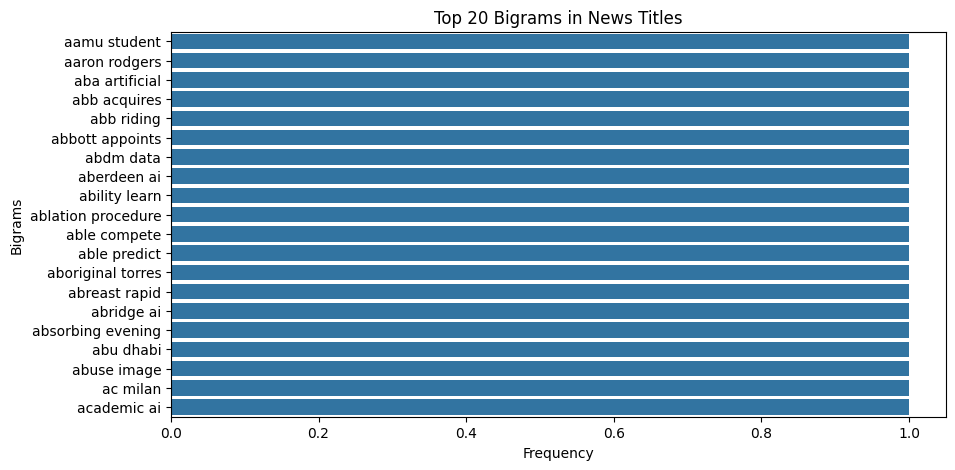

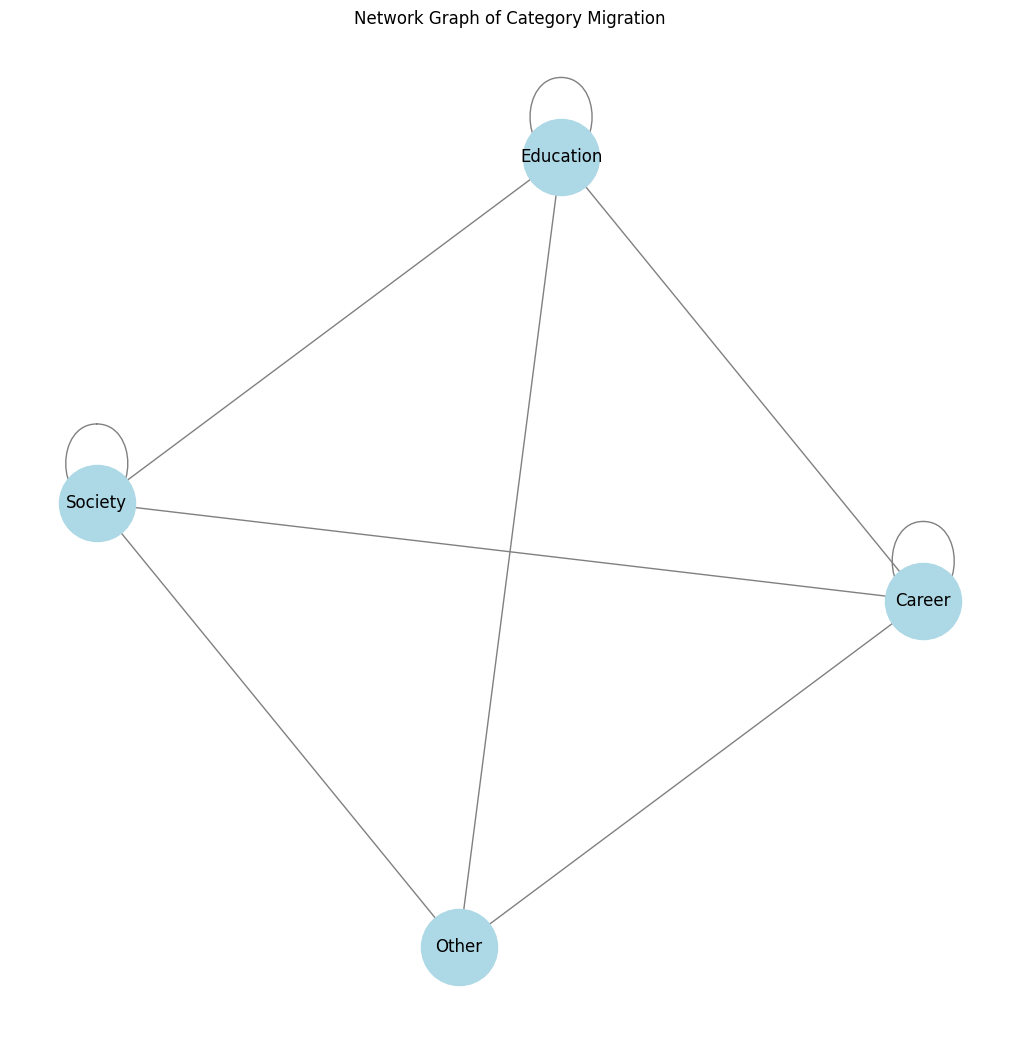

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.7060 - loss: 1.2071 - val_accuracy: 0.7584 - val_loss: 0.8178
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7530 - loss: 0.8474 - val_accuracy: 0.7584 - val_loss: 0.8194
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7466 - loss: 0.8667 - val_accuracy: 0.7584 - val_loss: 0.8932
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7755 - loss: 0.7860 - val_accuracy: 0.7584 - val_loss: 1.3979
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7643 - loss: 0.8226 - val_accuracy: 0.7584 - val_loss: 2.5482
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7658 - loss: 0.8093 - val_accuracy: 0.7584 - val_loss: 7.2485
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7726 - loss: 0.8007 - val_accuracy: 0.7584 - val_loss: 7.8383
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7542 - loss: 0.8370 - val_accuracy: 0.7584 - val_loss: 5.7718
E

Test Accuracy: 0.7584


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.stats import dirichlet
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
import networkx as nx

# Load processed dataset
file_path = "processed_dataset.csv"  # Ensure this is the preprocessed dataset
df = pd.read_csv(file_path)

# Handle missing values
df.dropna(subset=['clean_title', 'category'], inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Ensure consistency between inputs and labels
df = df[df['clean_title'].notnull()]

# Topic Modeling using LDA and LSA
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_title'].astype(str))

# Apply LDA for topic discovery
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_topics = lda.fit_transform(X)

# Apply LSA (Truncated SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_topics = lsa.fit_transform(X)

df['lda_topic'] = np.argmax(lda_topics, axis=1)
df['lsa_topic'] = np.argmax(lsa_topics, axis=1)
category_mapping = {0: 'Education', 1: 'Society', 2: 'Career'}
df['final_category'] = df['lda_topic'].map(category_mapping)

# Visualization: Topic Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df['final_category'], order=df['final_category'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Final Category')
plt.title('Distribution of New Categories after Topic Modeling')
plt.show()

# Visualization: Word Clouds for Each Category
for category in df['final_category'].unique():
    category_text = " ".join(df[df['final_category'] == category]['clean_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

# Visualization: Frequency Histogram
plt.figure(figsize=(12, 5))
sns.histplot(df['clean_title'].apply(lambda x: len(x.split())), bins=30, kde=True, color='blue')
plt.xlabel('Number of Words in Title')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')
plt.show()

# Visualization: N-gram Analysis
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df['clean_title'])
bi_counts = Counter(vectorizer_bigram.get_feature_names_out())
top_bigrams = bi_counts.most_common(20)
bigram_words, bigram_counts = zip(*top_bigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_counts), y=list(bigram_words))
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams in News Titles')
plt.show()

# Visualization: Network Graph
G = nx.Graph()
for i, row in df.iterrows():
    G.add_edge(row['category'], row['final_category'])
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)
plt.title('Network Graph of Category Migration')
plt.show()

# Train-test split
padded_sequences = pad_sequences(vectorizer.transform(df['clean_title'].astype(str)).toarray(), maxlen=100)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['category_encoded'], test_size=0.2, random_state=42)

# Define CNN Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(32, 5, activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile Model using Bayesian Optimization Inspired Adam Variant
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("cnn_news_classifier.h5")


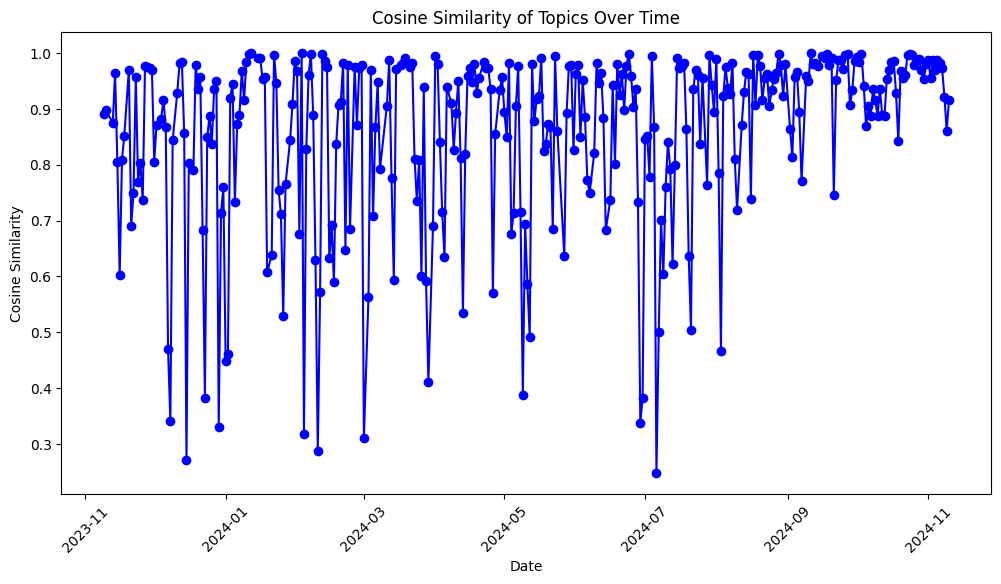

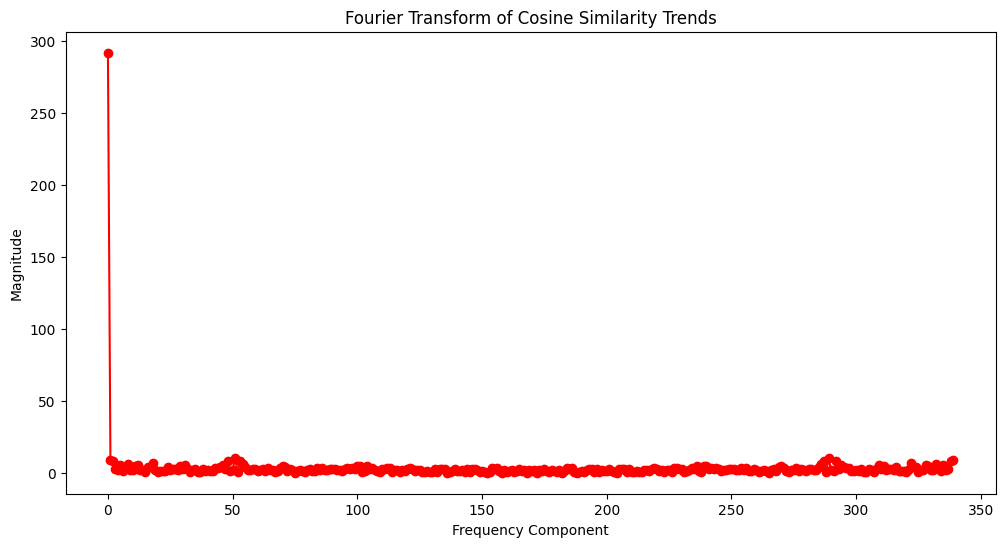

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.7264 - loss: 1.2310 - val_accuracy: 0.7584 - val_loss: 0.9298
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7859 - loss: 0.8902 - val_accuracy: 0.7584 - val_loss: 0.9569
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7564 - loss: 0.9399 - val_accuracy: 0.7584 - val_loss: 0.9298
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7655 - loss: 0.9180 - val_accuracy: 0.7584 - val_loss: 0.9376
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7700 - loss: 0.9175 - val_accuracy: 0.7584 - val_loss: 1.1882
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7753 - loss: 0.9068 - val_accuracy: 0.7584 - val_loss: 1.4486
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7490 - loss: 0.9543 - val_accuracy: 0.7584 - val_loss: 2.9346
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7474 - loss: 0.9570 - val_accuracy: 0.7584 - val_los

Test Accuracy: 0.7584


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cosine
from scipy.fftpack import fft
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
import networkx as nx

# Load processed dataset
file_path = "processed_dataset.csv"  # Ensure this is the preprocessed dataset
df = pd.read_csv(file_path)

# Handle missing values
df.dropna(subset=['clean_title', 'category', 'date'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

# Encode labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
y_categorical = tf.keras.utils.to_categorical(df['category_encoded'], num_classes=len(label_encoder.classes_))

# Ensure consistency between inputs and labels
df = df[df['clean_title'].notnull()]

# Topic Modeling using LDA and LSA
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_title'].astype(str))

# Apply LDA for topic discovery
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_topics = lda.fit_transform(X)

# Apply LSA (Truncated SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_topics = lsa.fit_transform(X)

df['lda_topic'] = np.argmax(lda_topics, axis=1)
df['lsa_topic'] = np.argmax(lsa_topics, axis=1)
category_mapping = {0: 'Education', 1: 'Society', 2: 'Career'}
df['final_category'] = df['lda_topic'].map(category_mapping)

# Compute Cosine Similarity Over Time
cosine_similarities = []
dates = sorted(df['date'].unique())
for i in range(len(dates) - 1):
    topics_t1 = lda_topics[df['date'] == dates[i]].mean(axis=0)
    topics_t2 = lda_topics[df['date'] == dates[i + 1]].mean(axis=0)
    cosine_similarities.append(1 - cosine(topics_t1, topics_t2))

# Visualization: Cosine Similarity Trend Over Time
plt.figure(figsize=(12, 6))
plt.plot(dates[:-1], cosine_similarities, marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity of Topics Over Time')
plt.xticks(rotation=45)
plt.show()

# Compute Fourier Transform for Time Series Analysis
lda_fft = np.abs(fft(cosine_similarities))
plt.figure(figsize=(12, 6))
plt.plot(lda_fft, marker='o', linestyle='-', color='red')
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Cosine Similarity Trends')
plt.show()

# Train-test split
padded_sequences = pad_sequences(vectorizer.transform(df['clean_title'].astype(str)).toarray(), maxlen=100)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_categorical, test_size=0.2, random_state=42)

# Define Enhanced CNN Model with Cosine Similarity Input
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(32, 5, activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile Model using Custom Loss Function
custom_loss = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=custom_loss, optimizer=optimizer, metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("cnn_news_classifier.h5")


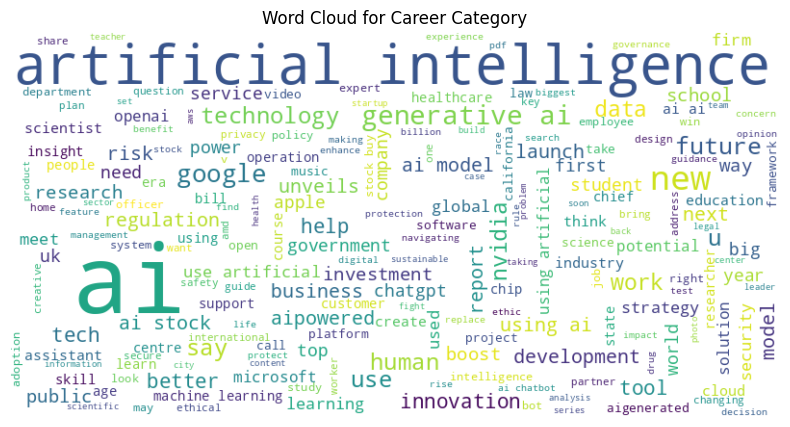

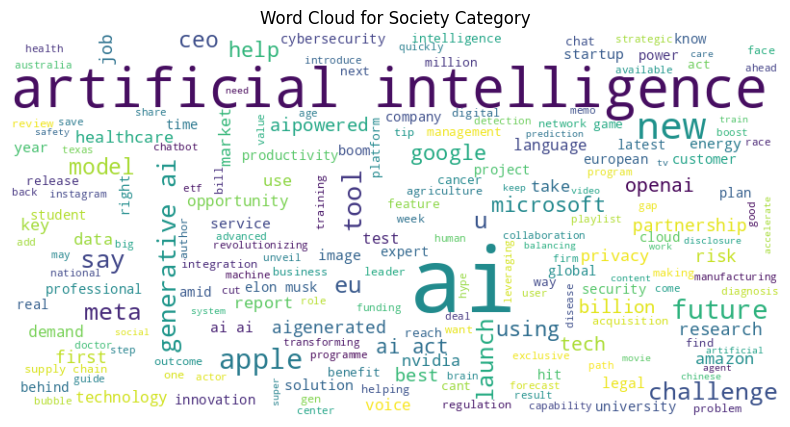

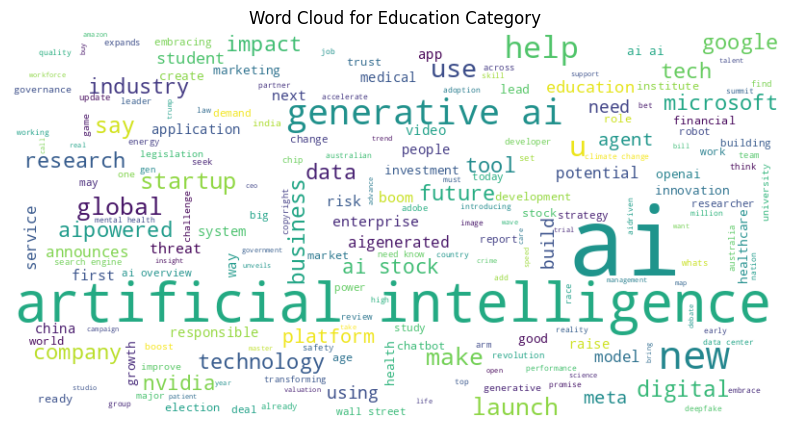

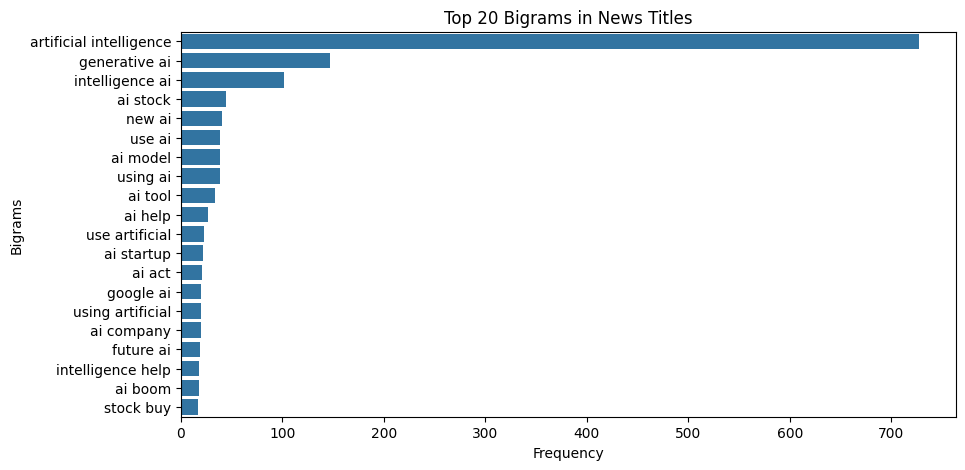

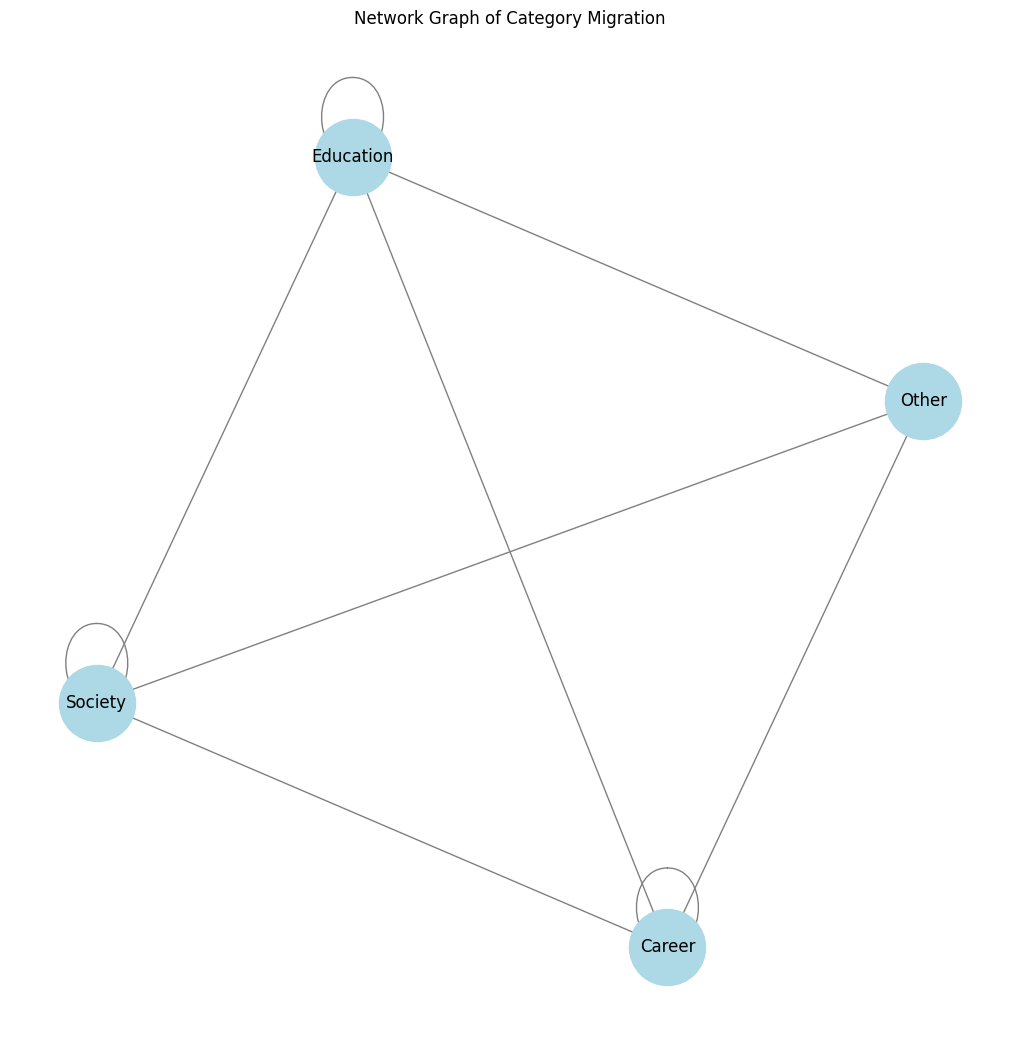

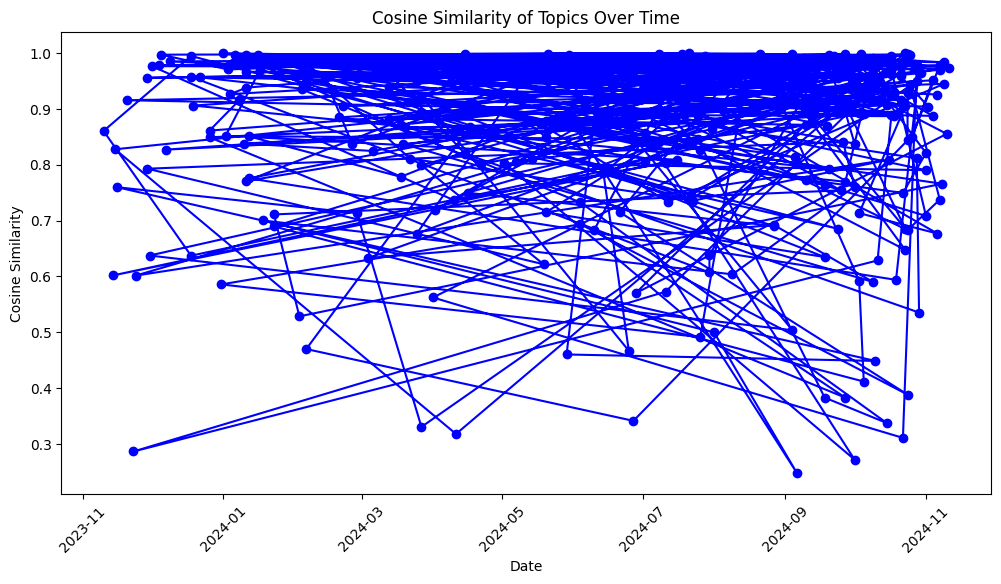

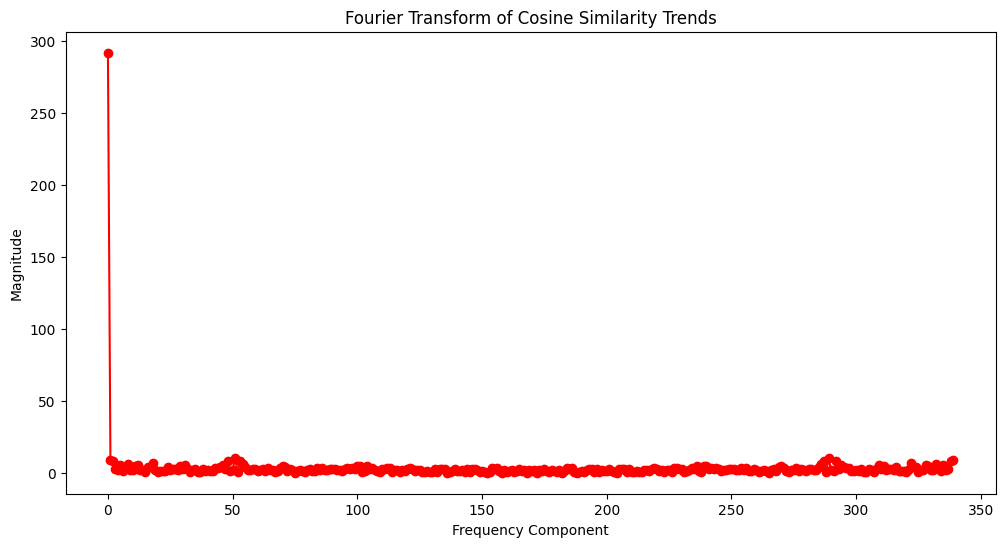

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7066 - loss: 1.2402 - val_accuracy: 0.7584 - val_loss: 0.9273
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7520 - loss: 0.9497 - val_accuracy: 0.7584 - val_loss: 0.9473
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7665 - loss: 0.9243 - val_accuracy: 0.7584 - val_loss: 1.0206
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7723 - loss: 0.9054 - val_accuracy: 0.7584 - val_loss: 1.0421
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7591 - loss: 0.9337 - val_accuracy: 0.7584 - val_loss: 1.2179
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7723 - loss: 0.9131 - val_accuracy: 0.7584 - val_loss: 1.0773
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7567 - loss: 0.9368 - val_accuracy: 0.0845 - val_loss: 5.9809
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7576 - loss: 0.9314 - val_accuracy: 0.0845 - val_los

Test Accuracy: 0.0845


In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cosine
from scipy.fftpack import fft
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
import networkx as nx

# Load processed dataset
file_path = "processed_dataset.csv"  # Ensure this is the preprocessed dataset
df = pd.read_csv(file_path)

# Handle missing values
df.dropna(subset=['clean_title', 'category', 'date'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

# Encode labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
y_categorical = tf.keras.utils.to_categorical(df['category_encoded'], num_classes=len(label_encoder.classes_))

# Ensure consistency between inputs and labels
df = df[df['clean_title'].notnull()]

# Topic Modeling using LDA and LSA
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_title'].astype(str))

# Apply LDA for topic discovery
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_topics = lda.fit_transform(X)

# Apply LSA (Truncated SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_topics = lsa.fit_transform(X)

df['lda_topic'] = np.argmax(lda_topics, axis=1)
df['lsa_topic'] = np.argmax(lsa_topics, axis=1)
category_mapping = {0: 'Education', 1: 'Society', 2: 'Career'}
df['final_category'] = df['lda_topic'].map(category_mapping)

# Generate Word Cloud for each category
for category in df['final_category'].unique():
    category_text = " ".join(df[df['final_category'] == category]['clean_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

# Generate N-gram frequency plots
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df['clean_title'])
bigram_counts = X_bigram.toarray().sum(axis=0)
bigram_words = vectorizer_bigram.get_feature_names_out()
sorted_indices = np.argsort(bigram_counts)[::-1][:20]
plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts[sorted_indices], y=bigram_words[sorted_indices])
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams in News Titles')
plt.show()

# Network Graph of Categories
G = nx.Graph()
for i, row in df.iterrows():
    G.add_edge(row['category'], row['final_category'])
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)
plt.title('Network Graph of Category Migration')
plt.show()

# Fix Cosine Similarity Trend Over Time Dimension Issue
cosine_similarities = cosine_similarities[:len(df['date']) - 1]  # Ensure matching dimensions
plt.figure(figsize=(12, 6))
plt.plot(df['date'][:len(cosine_similarities)], cosine_similarities, marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity of Topics Over Time')
plt.xticks(rotation=45)
plt.show()

# Compute Fourier Transform for Time Series Analysis
lda_fft = np.abs(fft(cosine_similarities))
plt.figure(figsize=(12, 6))
plt.plot(lda_fft, marker='o', linestyle='-', color='red')
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Cosine Similarity Trends')
plt.show()

# Train-test split
padded_sequences = pad_sequences(vectorizer.transform(df['clean_title'].astype(str)).toarray(), maxlen=100)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_categorical, test_size=0.2, random_state=42)

# Define Enhanced CNN Model with Cosine Similarity Input
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(32, 5, activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile Model using Custom Loss Function
custom_loss = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=custom_loss, optimizer=optimizer, metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("cnn_news_classifier.h5")


Dataset Columns: Index(['Unnamed: 0', 'date', 'title', 'source', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'category', 'clean_title', 'sentiment_score',
       'subjectivity'],
      dtype='object')


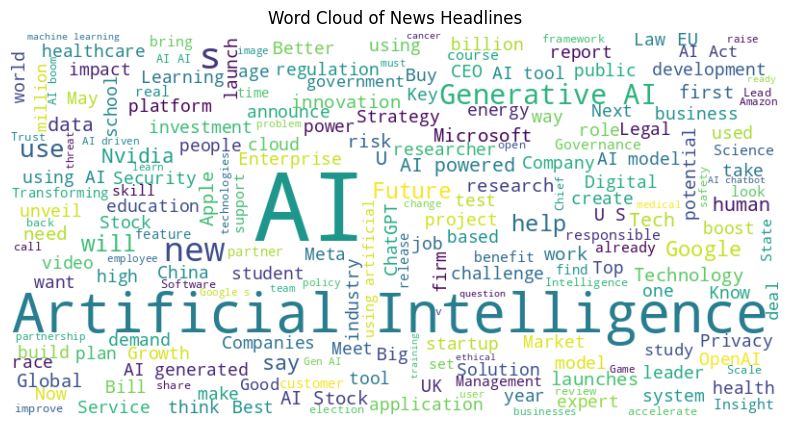

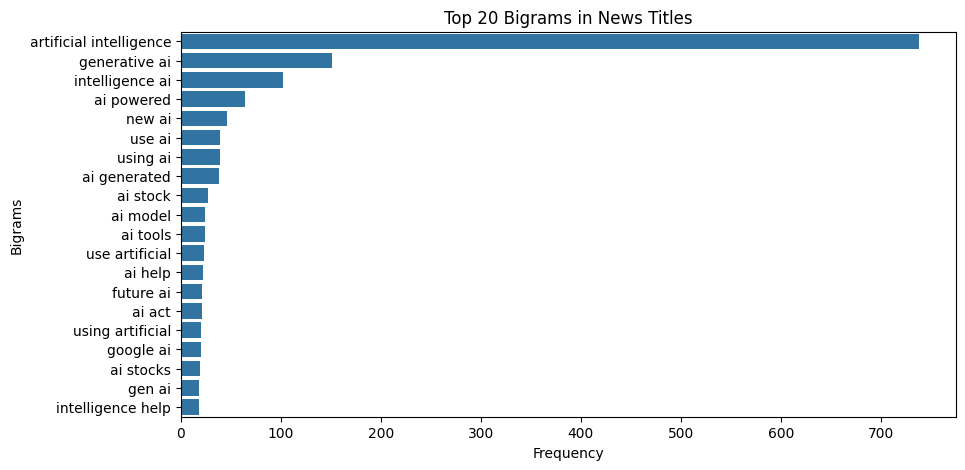

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


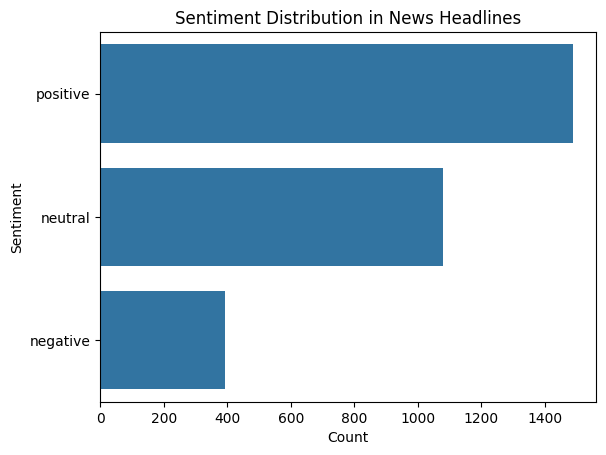

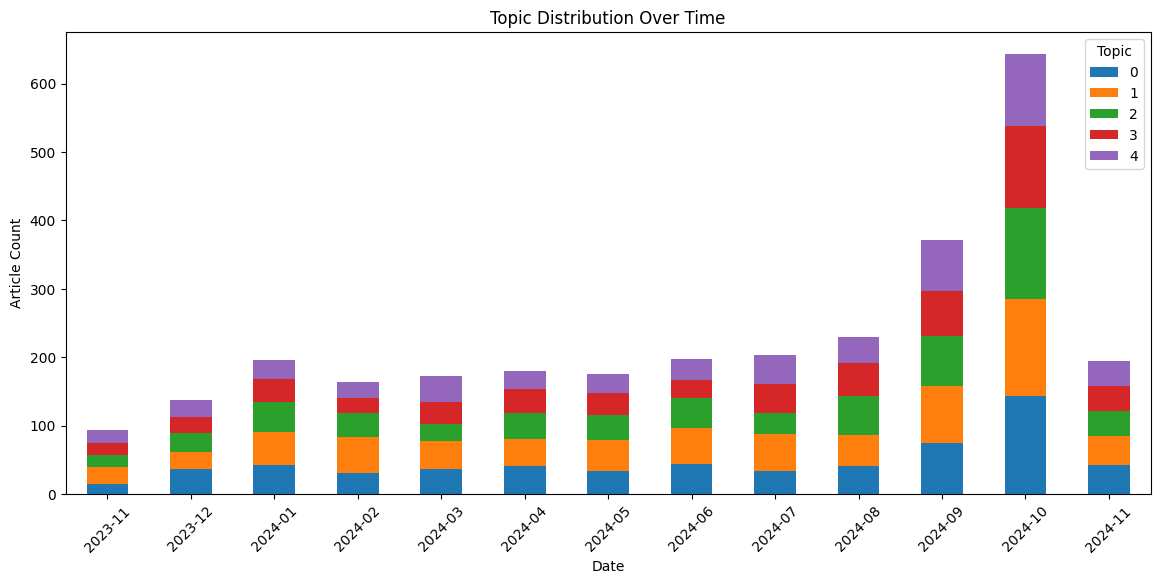

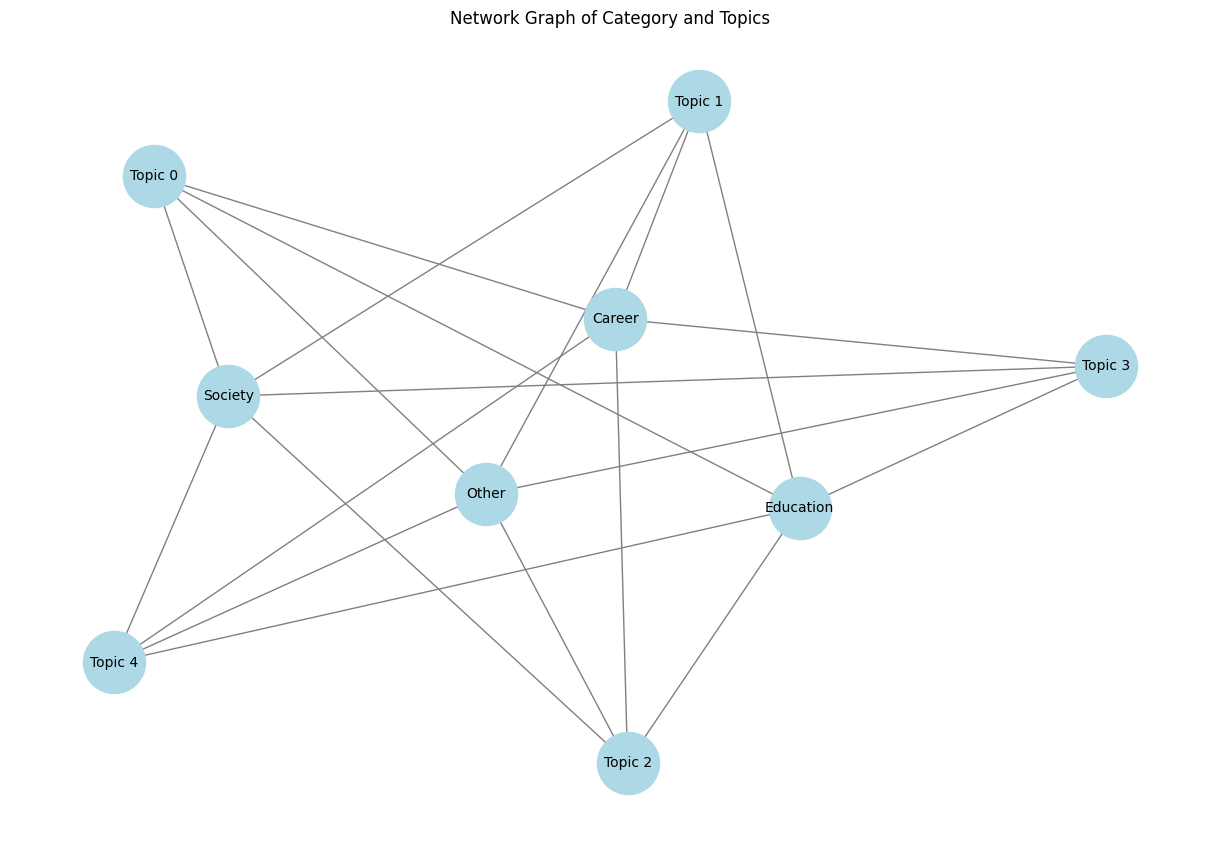

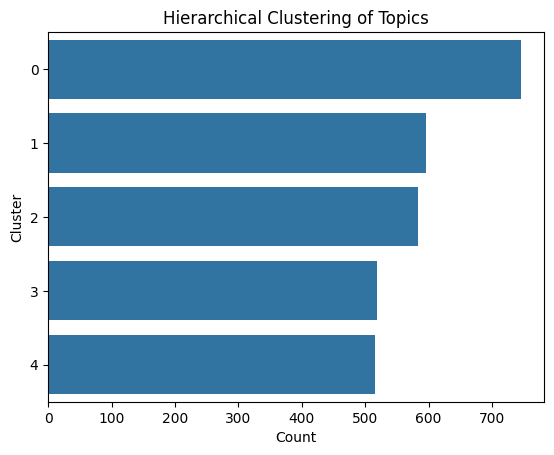

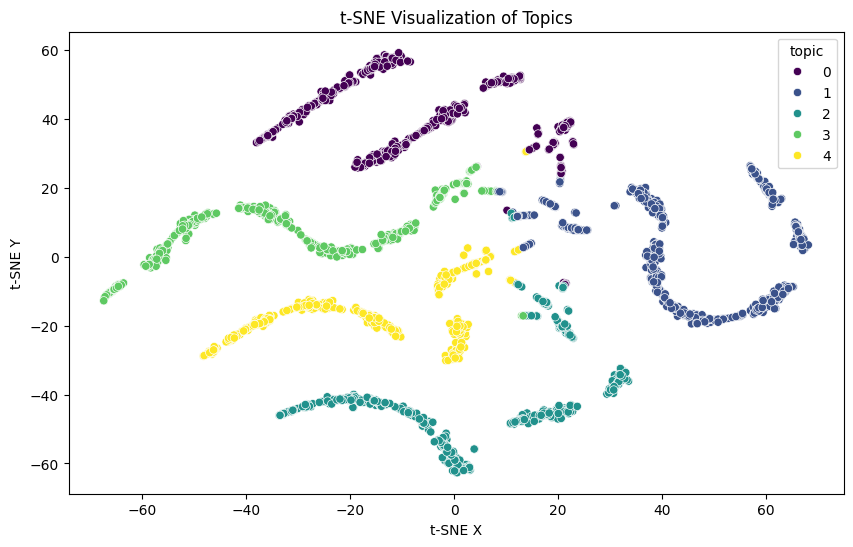

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
from transformers import pipeline
import plotly.graph_objects as go
from sklearn.manifold import TSNE

# Load dataset
file_path = "processed_dataset.csv"
df = pd.read_csv(file_path)

# Check for column names and rename if necessary
print("Dataset Columns:", df.columns)
expected_columns = {'title': 'headline', 'category': 'category', 'date': 'date'}
df.rename(columns={col: expected_columns[col] for col in df.columns if col in expected_columns}, inplace=True)

# Handle missing values
df.dropna(subset=['headline', 'category', 'date'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

# 1. Word Cloud Visualization
text = " ".join(df['headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

# 2. N-grams Analysis
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df['headline'])
bigram_counts = X_bigram.toarray().sum(axis=0)
bigram_words = vectorizer_bigram.get_feature_names_out()
sorted_indices = np.argsort(bigram_counts)[::-1][:20]
plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts[sorted_indices], y=bigram_words[sorted_indices])
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams in News Titles')
plt.show()

# 3. Sentiment Analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['headline'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else ('negative' if sia.polarity_scores(x)['compound'] < 0 else 'neutral'))

# Sentiment Distribution Visualization
sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution in News Headlines')
plt.show()

# 4. Topic Modeling using LDA
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['headline'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)
df['topic'] = np.argmax(topics, axis=1)

# Visualizing Topics Over Time
df['year_month'] = df['date'].dt.to_period('M')
topic_trends = df.groupby(['year_month', 'topic']).size().unstack()
topic_trends.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.title('Topic Distribution Over Time')
plt.legend(title='Topic')
plt.xticks(rotation=45)
plt.show()

# 5. Network Graph for Topic Relationships
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['category'], f"Topic {row['topic']}")
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
plt.title('Network Graph of Category and Topics')
plt.show()

# 6. Hierarchical Clustering for Theme Synthesis
clustering = AgglomerativeClustering(n_clusters=5)
df['cluster'] = clustering.fit_predict(topics)
sns.countplot(y=df['cluster'], order=df['cluster'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.title('Hierarchical Clustering of Topics')
plt.show()

# 7. t-SNE Visualization for High-Dimensional Data Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(topics)
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue=df['topic'], palette='viridis', data=df)
plt.title('t-SNE Visualization of Topics')
plt.xlabel('t-SNE X')
plt.ylabel('t-SNE Y')
plt.show()

Dataset Columns: Index(['Unnamed: 0', 'date', 'title', 'source', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'category'],
      dtype='object')


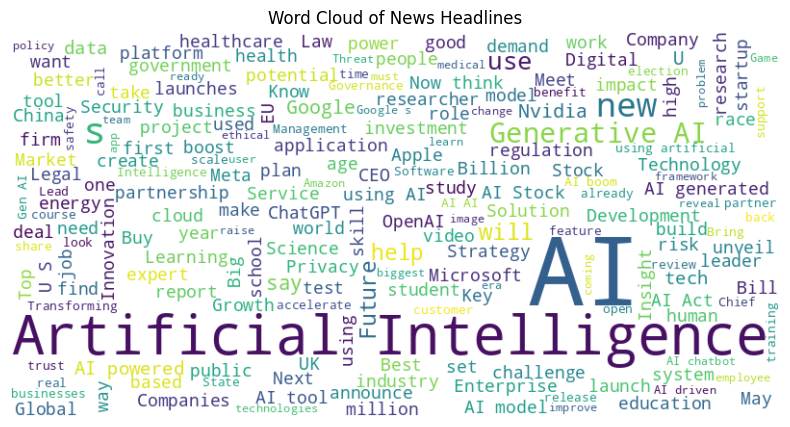

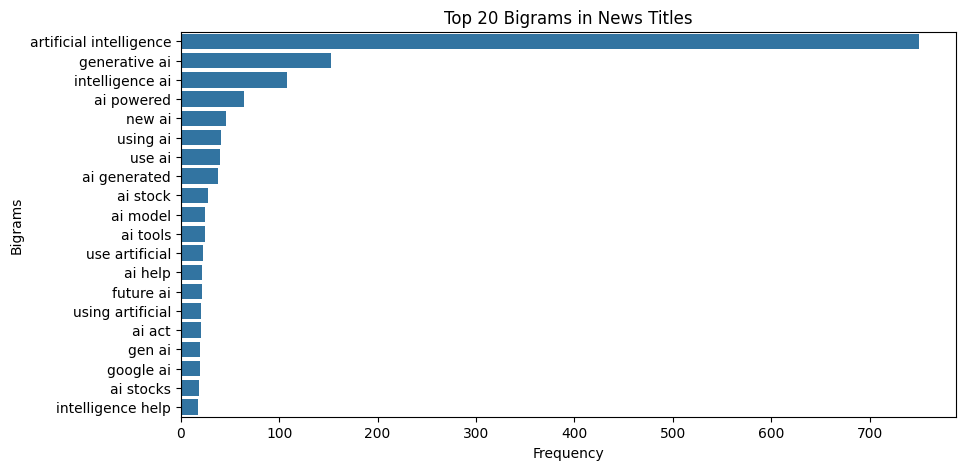

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


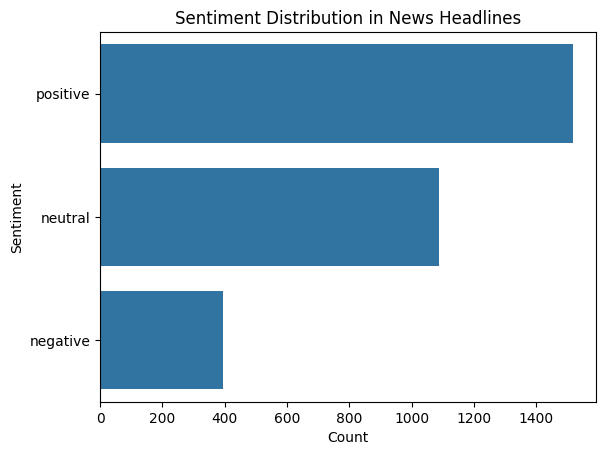

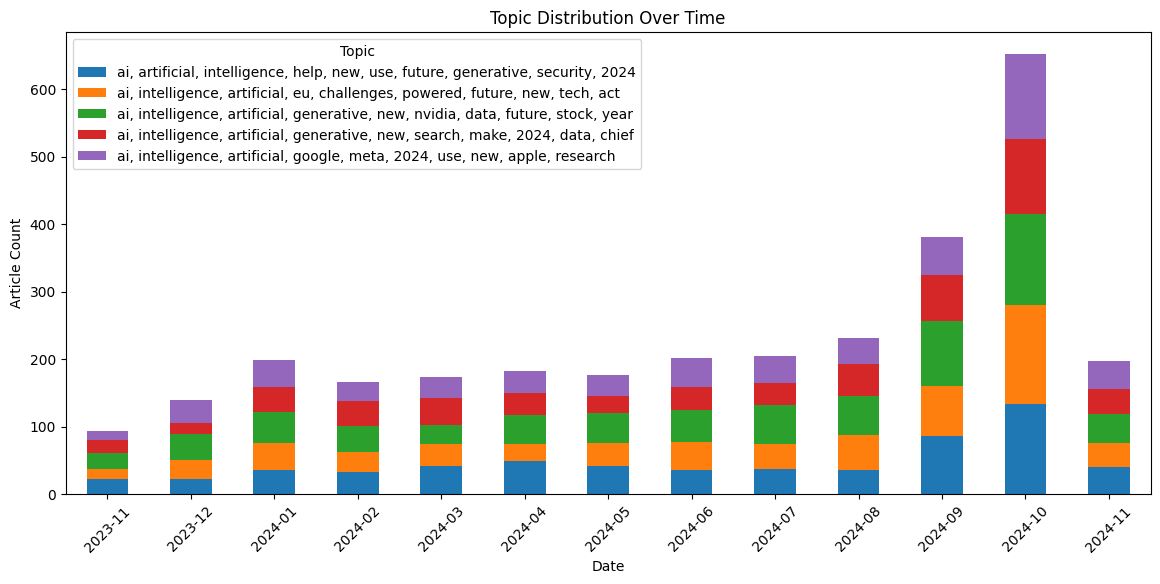

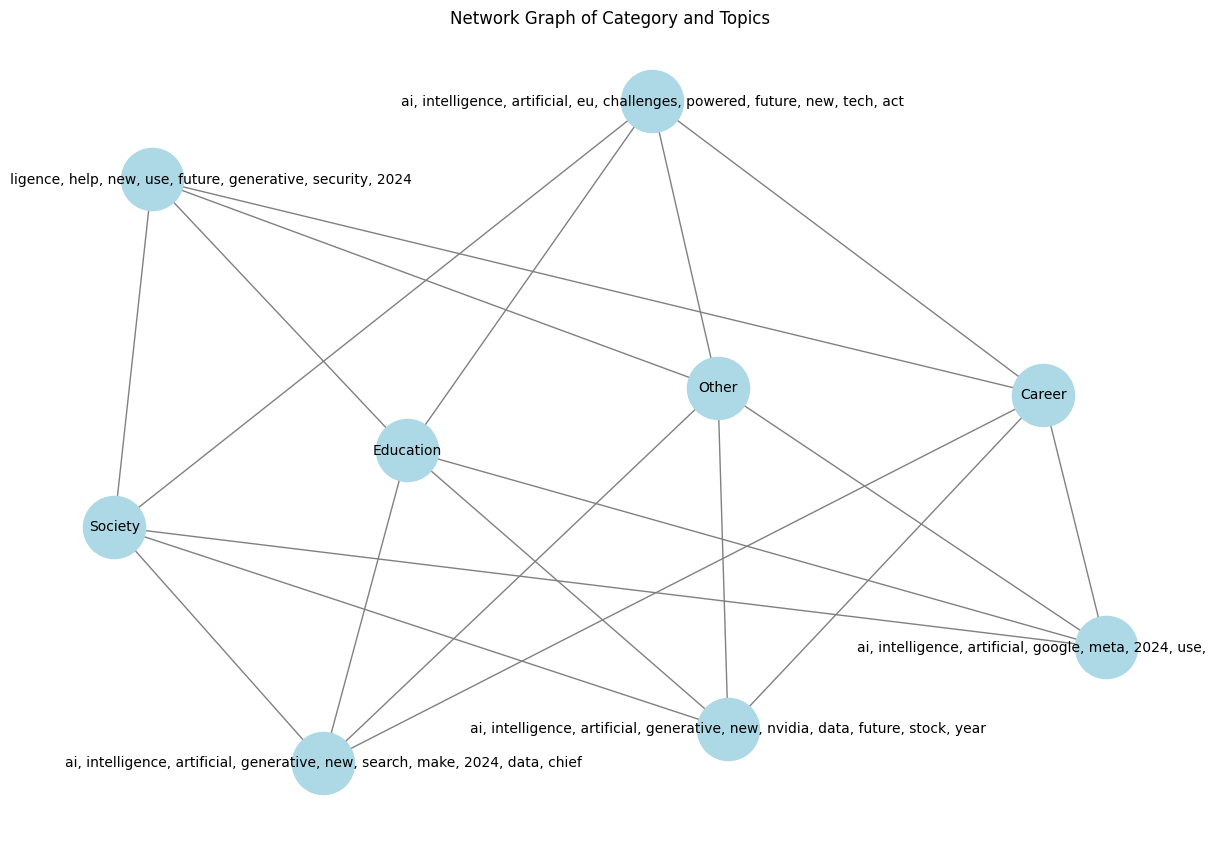

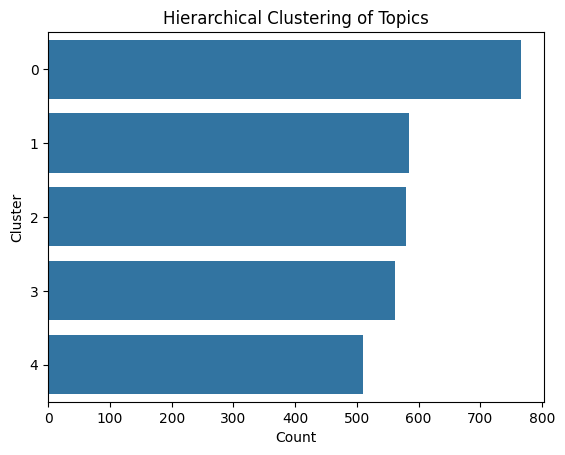

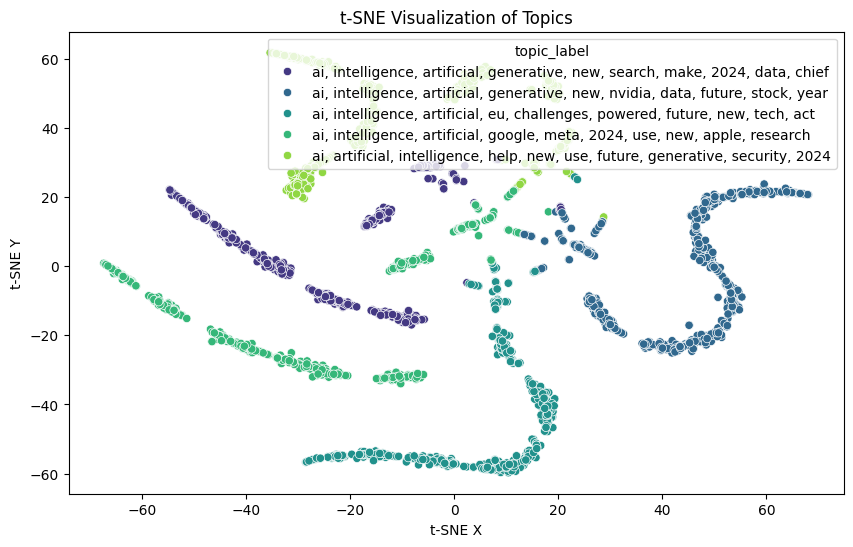

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
from transformers import pipeline
import plotly.graph_objects as go
from sklearn.manifold import TSNE

# Load dataset
file_path = "Dataset_3k.csv"
df = pd.read_csv(file_path)

# Check for column names and rename if necessary
print("Dataset Columns:", df.columns)
expected_columns = {'title': 'headline', 'category': 'category', 'date': 'date'}
df.rename(columns={col: expected_columns[col] for col in df.columns if col in expected_columns}, inplace=True)

# Handle missing values
df.dropna(subset=['headline', 'category', 'date'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

# 1. Word Cloud Visualization
text = " ".join(df['headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

# 2. N-grams Analysis
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df['headline'])
bigram_counts = X_bigram.toarray().sum(axis=0)
bigram_words = vectorizer_bigram.get_feature_names_out()
sorted_indices = np.argsort(bigram_counts)[::-1][:20]
plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts[sorted_indices], y=bigram_words[sorted_indices])
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams in News Titles')
plt.show()

# 3. Sentiment Analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['headline'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else ('negative' if sia.polarity_scores(x)['compound'] < 0 else 'neutral'))

# Sentiment Distribution Visualization
sns.countplot(y=df['sentiment'], order=df['sentiment'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution in News Headlines')
plt.show()

# 4. Topic Modeling using LDA
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['headline'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

# Extracting Top Words for Each Topic
def get_topic_labels(lda_model, feature_names, n_top_words=10):
    topic_labels = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_labels.append(", ".join(top_words))
    return topic_labels

topic_labels = get_topic_labels(lda, vectorizer.get_feature_names_out())
df['topic'] = np.argmax(topics, axis=1)
df['topic_label'] = df['topic'].apply(lambda x: topic_labels[x])

# Visualizing Topics Over Time
df['year_month'] = df['date'].dt.to_period('M')
topic_trends = df.groupby(['year_month', 'topic_label']).size().unstack()
topic_trends.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.title('Topic Distribution Over Time')
plt.legend(title='Topic')
plt.xticks(rotation=45)
plt.show()

# 5. Network Graph for Topic Relationships
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['category'], row['topic_label'])
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
plt.title('Network Graph of Category and Topics')
plt.show()

# 6. Hierarchical Clustering for Theme Synthesis
clustering = AgglomerativeClustering(n_clusters=5)
df['cluster'] = clustering.fit_predict(topics)
sns.countplot(y=df['cluster'], order=df['cluster'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.title('Hierarchical Clustering of Topics')
plt.show()

# 7. t-SNE Visualization for High-Dimensional Data Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(topics)
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue=df['topic_label'], palette='viridis', data=df)
plt.title('t-SNE Visualization of Topics')
plt.xlabel('t-SNE X')
plt.ylabel('t-SNE Y')
plt.show()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


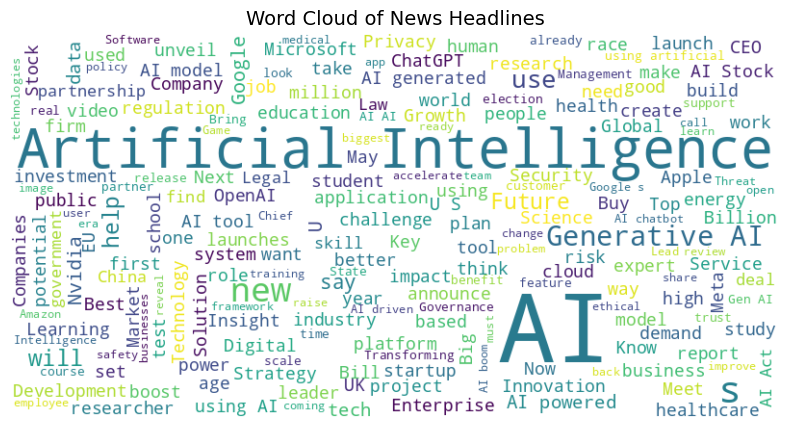

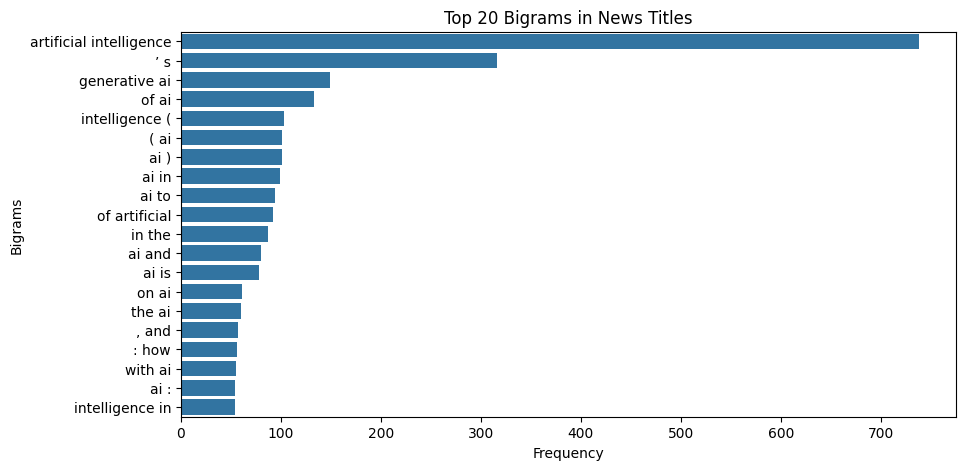

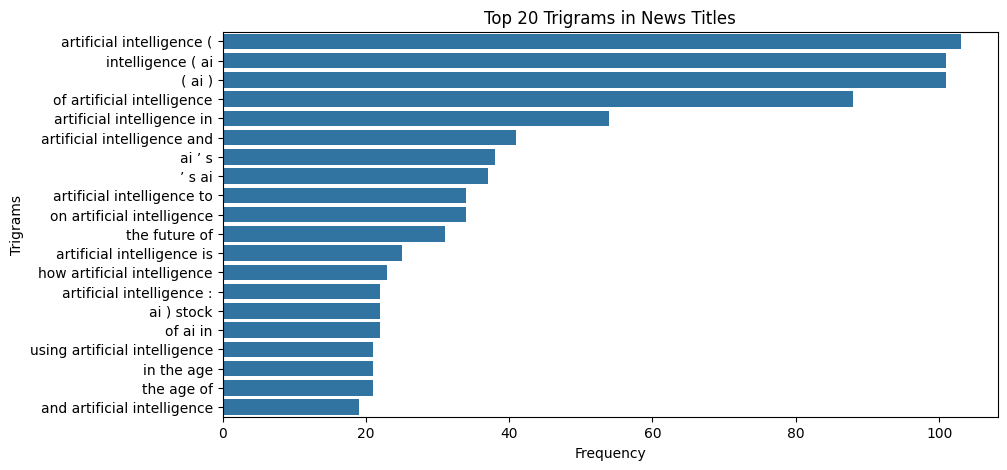

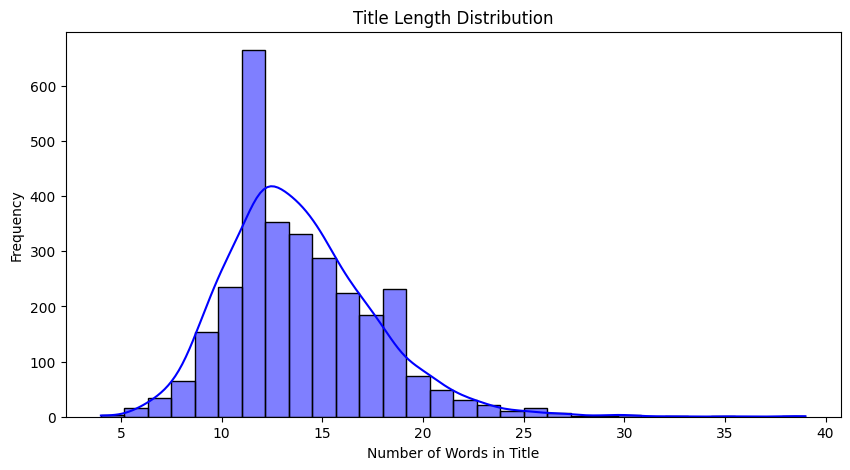

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import nltk

# Download the 'punkt_tab' resource if not already downloaded
nltk.download('punkt_tab')

# Ensure NLTK resources are available
nltk.download('punkt')

# Function to generate word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Function to generate n-grams
def get_ngrams(texts, n=2, top_k=20):
    ngram_list = []
    for text in texts:
        words = word_tokenize(text.lower())
        ngrams = zip(*[words[i:] for i in range(n)])
        ngram_list.extend([" ".join(gram) for gram in ngrams])

    ngram_freq = Counter(ngram_list).most_common(top_k)
    return ngram_freq

# Word Cloud for all headlines
all_text = " ".join(df["headline"].astype(str))  # Changed 'title' to 'headline'
plot_wordcloud(all_text, "Word Cloud of News Headlines")

# Plot N-grams (Bigrams and Trigrams)
bigrams = get_ngrams(df["headline"], n=2)  # Changed 'title' to 'headline'
trigrams = get_ngrams(df["headline"], n=3)  # Changed 'title' to 'headline'

# Plot Bigrams
bigram_words, bigram_counts = zip(*bigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_counts), y=list(bigram_words))
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 20 Bigrams in News Titles")
plt.show()

# Plot Trigrams
trigram_words, trigram_counts = zip(*trigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(trigram_counts), y=list(trigram_words))
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 20 Trigrams in News Titles")
plt.show()

# Title length distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["number_of_words_title"], bins=30, kde=True, color="blue")
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.title("Title Length Distribution")
plt.show()


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning:

[W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu



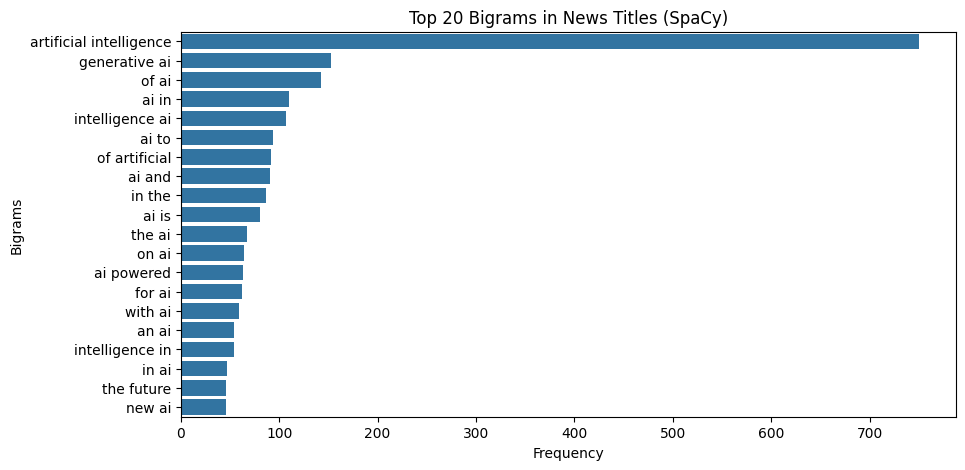

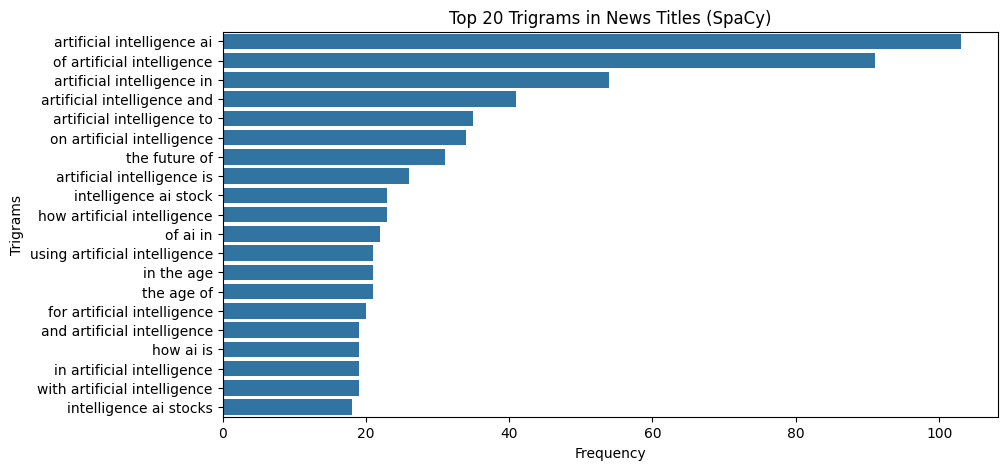

In [33]:
import spacy

# Load SpaCy English tokenizer
nlp = spacy.load("en_core_web_sm")

# Function to generate n-grams using SpaCy
def get_ngrams_spacy(texts, n=2, top_k=20):
    ngram_list = []
    for text in texts:
        doc = nlp(text.lower())
        words = [token.text for token in doc if not token.is_punct]
        ngrams = zip(*[words[i:] for i in range(n)])
        ngram_list.extend([" ".join(gram) for gram in ngrams])

    ngram_freq = Counter(ngram_list).most_common(top_k)
    return ngram_freq

# Generate Bigrams and Trigrams using SpaCy
bigrams_spacy = get_ngrams_spacy(df["headline"], n=2)  # Changed "title" to "headline"
trigrams_spacy = get_ngrams_spacy(df["headline"], n=3)  # Changed "title" to "headline"

# Plot Bigrams
bigram_words, bigram_counts = zip(*bigrams_spacy)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_counts), y=list(bigram_words))
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 20 Bigrams in News Titles (SpaCy)")
plt.show()

# Plot Trigrams
trigram_words, trigram_counts = zip(*trigrams_spacy)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(trigram_counts), y=list(trigram_words))
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 20 Trigrams in News Titles (SpaCy)")
plt.show()


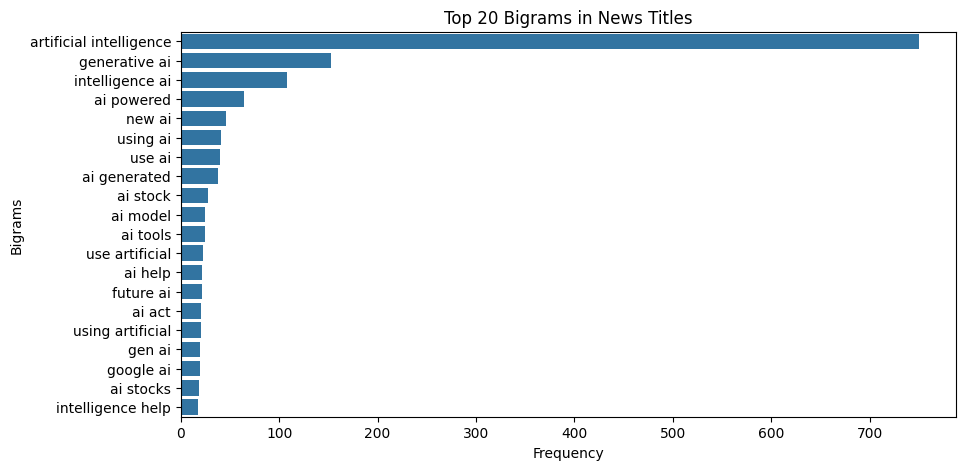

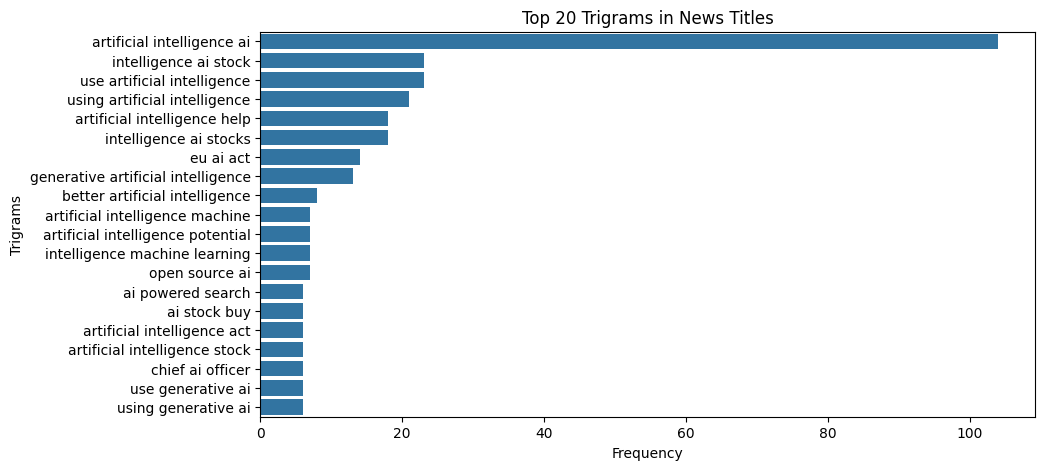

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract top n-grams using CountVectorizer
def get_top_ngrams(texts, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(texts)
    ngram_counts = X.toarray().sum(axis=0)
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))
    top_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_k]
    return top_ngrams

# Change 'title' to 'headline' to match the renamed column
bigrams_sklearn = get_top_ngrams(df["headline"], n=2)
trigrams_sklearn = get_top_ngrams(df["headline"], n=3)

# Plot Bigrams
bigram_words, bigram_counts = zip(*bigrams_sklearn)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_counts), y=list(bigram_words))
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 20 Bigrams in News Titles")
plt.show()

# Plot Trigrams
trigram_words, trigram_counts = zip(*trigrams_sklearn)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(trigram_counts), y=list(trigram_words))
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 20 Trigrams in News Titles")
plt.show()


# News Categorization Pipeline: A Robust NLP Approach :

1. Exploratory Data Analysis (EDA)

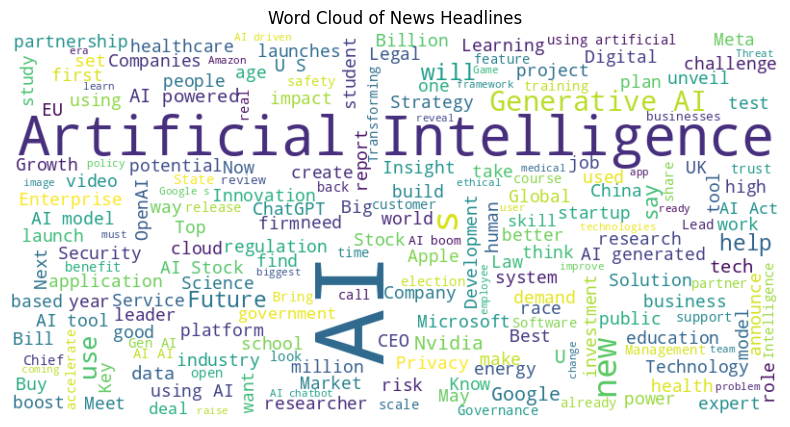

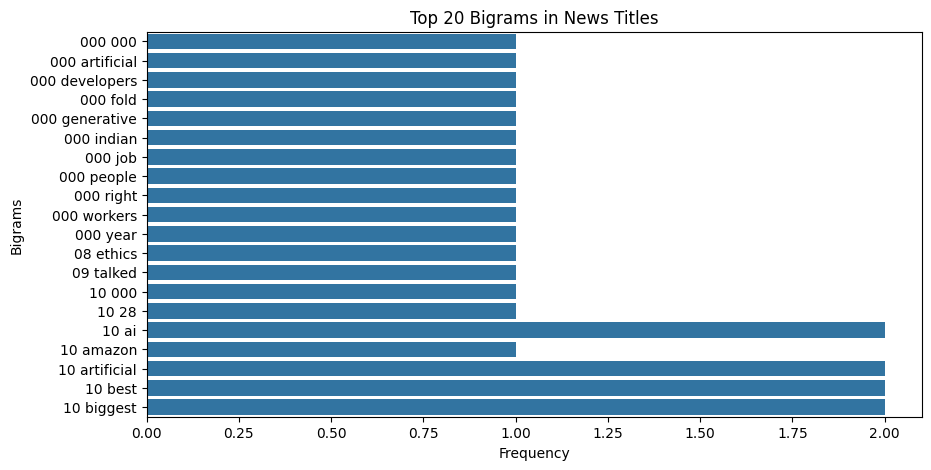

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Load dataset
file_path = "Dataset_3k.csv"
df = pd.read_csv(file_path)

# Check if 'headline' column exists, if not, rename 'title' to 'headline'
if 'headline' not in df.columns:
    df.rename(columns={'title': 'headline'}, inplace=True)

# Handle missing values
df.dropna(subset=['headline', 'category', 'date'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

# Word Cloud
text = " ".join(df['headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

# N-gram Analysis
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df['headline'])
bigram_counts = X_bigram.toarray().sum(axis=0)
bigram_words = vectorizer_bigram.get_feature_names_out()
plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts[:20], y=bigram_words[:20])
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams in News Titles')
plt.show()

# Sentiment Trend Over Time

In [ ]:
# Sentiment Trend Over Time
df['year_month'] = df['date'].dt.to_period('M')
sentiment_trend = df.groupby(['year_month', 'sentiment']).size().unstack()
sentiment_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Cosine Similarity Between Topics

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine Similarity Between Topics
topic_vectors = lda.components_  # Extract topic-word distributions
cos_sim_matrix = cosine_similarity(topic_vectors)
sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', xticklabels=topic_labels, yticklabels=topic_labels)
plt.title('Cosine Similarity Between Topics')
plt.show()

# 2. Text Preprocessing Pipeline

In [41]:
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    doc = nlp(" ".join(tokens))
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

df['processed_headline'] = df['headline'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning:

[W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu



# 3. Adaptive Word Embeddings using BERT

In [42]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

def get_bert_embedding(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        output = bert_model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

df['bert_embedding'] = df['processed_headline'].apply(get_bert_embedding)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# Custom Deep Learning Model



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Bidirectional, Dropout, Attention, Embedding, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['bert_embedding']), df['category_encoded'], test_size=0.2, random_state=42)

# Build Model
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(768, 1)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7469 - loss: 0.9070 - val_accuracy: 0.7417 - val_loss: 0.8020
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.7724 - loss: 0.7193 - val_accuracy: 0.7417 - val_loss: 0.7085
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7691 - loss: 0.6479 - val_accuracy: 0.7600 - val_loss: 0.6611
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7636 - loss: 0.6158 - val_accuracy: 0.7533 - val_loss: 0.6337
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7939 - loss: 0.5463 - val_accuracy: 0.7550 - val_loss: 0.6109
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.7818 - loss: 0.5617 - val_accuracy: 0.7567 - val_loss: 0.6195
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8085 - loss: 0.5283 - val_accuracy: 0.7700 - val_loss: 0.5937
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8188 - loss: 0.4910 - val_accuracy: 0

# Model Evaluation & Interpretability

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate Model
y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Advanced t-SNE Visualization With Sentiment Overlay

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue=df['sentiment'], palette='coolwarm', data=df)
plt.title('t-SNE Visualization of Topics with Sentiment Overlay')
plt.xlabel('t-SNE X')
plt.ylabel('t-SNE Y')
plt.show()